 # <span style="color:red; font-weight:bold;">Rotten Tomatoes Models</span>
 


 # <span style="color:GREEN; font-weight:bold;">Import The Necessary Library</span>
 


In [287]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")




 # <span style="color:GREEN; font-weight:bold;">Load The Data</span>


In [288]:
df=pd.read_csv("/kaggle/input/dataset-zoho/Rotten_Tomatoes_Movies3 - Copy.csv")
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",02-10-1981,27-05-2003,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",04-03-2016,07-06-2016,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",17-12-1964,03-08-2004,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",17-06-1964,02-02-2001,139.0,Paramount Pictures,Fresh,95,21,91.0


 # <span style="color:GREEN; font-weight:bold;">Data Preprocessing</span>


In [289]:
df.dtypes

movie_title            object
movie_info             object
critics_consensus      object
rating                 object
genre                  object
directors              object
writers                object
cast                   object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
studio_name            object
tomatometer_status     object
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object

In [290]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [291]:
df.nunique()

movie_title           16106
movie_info            16613
critics_consensus      8307
rating                    8
genre                  1080
directors              8314
writers               12121
cast                  16326
in_theaters_date       5586
on_streaming_date      2260
runtime_in_minutes      201
studio_name            2886
tomatometer_status        3
tomatometer_rating      101
tomatometer_count       393
audience_rating          98
dtype: int64

In [292]:
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


## Dropped Columns and Reasons

1. **`movie_title`**  
   - **Reason**: The movie title is just a label and doesn’t help predict the audience rating. Removing it makes the model simpler and more efficient.

2. **`movie_info`**  
   - **Reason**: This column likely contains general information that doesn’t directly impact the prediction of the audience rating. Removing it reduces unnecessary complexity.

3. **`critics_consensus`**  
   - **Reason**: This column contains **8,329 missing values**. Imputing these values could lead to inaccuracies, as the imputed values might not align with the true nature of the data, which would negatively impact model performance.

4. **`cast`**  
   - **Reason**: The `cast` column has **many unique values**, making it challenging for the model to extract meaningful patterns. Dropping it reduces model complexity and helps focus on more impactful features.



In [293]:
df.drop(['movie_title','movie_info','critics_consensus','cast'],axis=1,inplace=True)

## Droped Null Values in the Rows
1. **`genre`**  
   - **Null Count**: 17  
   - **Action**: Since the number of null values is very small compared to the dataset size, removing these rows ensures that the model works with complete data without introducing imputation noise.

2. **`directors`**  
   - **Null Count**: 114  
   - **Action**: Similar to `genre`, the null count is relatively low. Deleting these rows is a straightforward approach to maintain data integrity without adding complexity.

3. **`audience_rating`**  
   - **Null Count**: 252  
   - **Action**: Since this is the target variable, rows with null values must be removed because these rows cannot contribute to model training. Retaining them would introduce inconsistency.

4. **`studio_name`**  
   - **Null Count**: 416  
   - **Action**: With only a small number of missing values, dropping these rows avoids the need for imputation while maintaining simplicity.
for imputation.


In [294]:
df = df.dropna(subset=['genre','directors','audience_rating','studio_name']).reset_index(drop=True)

# Handling the `genre` Column

1. **Text Preprocessing**:  
   - Initially, applied text preprocessing steps such as:
     - Converting text to lowercase.
     - Removing special characters, punctuation, and extra spaces.
     - Tokenization to split the text into meaningful components.

2. **Vectorization using TfidfVectorizer**:  
   - The `TfidfVectorizer` was used to transform the `genre` column into numerical vectors.
   - **Reason**: TfidfVectorizer assigns weights to words based on their importance in the text.  
     - High weight for unique or rare words in a row.
     - Low weight for common words across multiple rows.
   - This helps capture the significance of different genres for predictive modeling.


In [295]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_genres(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters 
    text = re.sub(r'[^a-z, ]', '', text)
    
    # Tokenize the text by splitting on commas
    tokens = text.split(', ')
    
    # 4. Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)




In [296]:
# Apply the preprocessing function to the 'genre' column
df['genre'] = df['genre'].apply(preprocess_genres)

# Now apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['genre'])

# Convert the resulting TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


# Concatenate the original DataFrame with the TF-IDF DataFrame
new=pd.concat([df, tfidf_df], axis=1)


#  Handling the `directors` Column

1. **Text Preprocessing**:  
   - Initially, applied text preprocessing steps to clean the data:
     - Converting text to lowercase.
     - Removing special characters, digits, and extra spaces.

2. **Target Encoding**:  
   - Used **target encoding** to encode the `directors` column based on the mean of the `audience_rating`.  
   - This method assigns a numeric value to each director, reflecting their contribution to the target variable.
   - In this method, there are issues of data leakage, but it can be handled by adding a regularization term.

3. **Addressing Data Leakage with Regularization**:
   - To prevent data leakage, a **regularization term** was added during target encoding. 
   - Regularization helps reduce overfitting by smoothing the encoded valueially fr rare 
   ing overfittinting or leakage.


In [297]:

def clean_director(director):
    # Replace special characters with space and strip extra spaces
    cleaned = re.sub(r'[^\w\s,]', '', director)  # Keep alphanumeric, whitespace, and commas
    return cleaned.strip().lower()

new['directors'] = new['directors'].apply(clean_director)



In [298]:
# Calculate the global mean
global_mean = new['audience_rating'].mean()

# Calculate the count of each category
counts = new.groupby('directors').size()

# Set smoothing parameter (m controls the strength of smoothing)
m = 10

# Calculate the mean for each director
category_means = new.groupby('directors')['audience_rating'].mean()

# Apply smoothing
smoothed_means = (category_means * counts + global_mean * m) / (counts + m)

# Map the smoothed mean values to the 'directors' column
new['directors_target_encoded_smoothed'] = new['directors'].map(smoothed_means)


### Handling the `writers` Column

1. **Null Value Handling**:  
   - The `writers` column has **1,349 null values**, which is a relatively large number.  
   - Instead of removing rows with null values, **imputation** is performed by replacing the `NaN` values with the label **'unknown'**.  
   - This ensures that we don’t lose a significant portion of data while maintaining consistency in the column.

2. **Target Encoding**:  
   - Similar to the `directors` column, **target encoding** is applied to the `writers` column.
   - This method encodes the `writers` based on the mean of the `audience_rating`, reflecting how different writers influence the target variable.
   - Regularization is used to handle data leakage, just as it was for the `directors` column. 


In [299]:
for col in ['writers']:
    new[col].fillna("Unknown", inplace=True)

In [300]:

def clean_writers(writers):
    # Replace special characters with space and strip extra spaces
    cleaned = re.sub(r'[^\w\s,]', '', writers)  
    return cleaned.strip().lower()

new['writers'] = new['writers'].apply(clean_writers)



In [301]:
# Calculate the global mean of audience_rating
global_mean = new['audience_rating'].mean()

# Calculate the count of each writer
counts = new.groupby('writers').size()

# Calculate the mean of audience_rating for each writer
category_means = new.groupby('writers')['audience_rating'].mean()

# Set a smoothing parameter (m controls the degree of smoothing)
m = 10

# Apply the smoothing formula
smoothed_means = (category_means * counts + global_mean * m) / (counts + m)

# Map the smoothed means to the 'writers' column
new['writers_encoded_smoothed'] = new['writers'].map(smoothed_means)

# If a writer doesn't appear in the mapping, assign them the global mean
new['writers_encoded_smoothed'] = new['writers_encoded_smoothed'].fillna(global_mean)




### Preprocessing the `studio_name` Column

1. **Text Preprocessing**:  
   - Applied text preprocessing steps to clean the `studio_name` column:
     - Converting text to lowercase.
     - Removing special characters, digits, and extra spaces.

2. **Target Encoding**:  
   - Used **target encoding** to encode the `studio_name` column based on the mean of the `audience_rating`.
   - Regularization was added to handle data leakage and reduce overfitting, ensuring that studios with fewer samples are smoothed towards the overall mean.


In [302]:
def preprocess_studio_name(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the studio_name column
new['studio_name'] = new['studio_name'].apply(preprocess_studio_name)

In [303]:
# Target Encoding
# Calculate the mean of the target variable ('audience_rating')
global_mean = new['audience_rating'].mean()

# Calculate the mean audience_rating for each 'studio_name'
studio_means = new.groupby('studio_name')['audience_rating'].mean()

# Calculate the count of each 'studio_name'
studio_counts = new['studio_name'].value_counts()

# Set the smoothing factor (a balance between the global mean and the studio mean)
smoothing_factor = 10  # You can experiment with this value

# Apply smoothing formula: Smoothed mean = (mean of studio * count + global mean * smoothing_factor) / (count + smoothing_factor)
studio_encoded = studio_means * studio_counts + global_mean * smoothing_factor
studio_encoded /= studio_counts + smoothing_factor

# Map the smoothed values to the 'studio_name' column in the DataFrame
new['studio_name_encoded'] = new['studio_name'].map(studio_encoded)


## Note on Encoding for `directors`, `writers`, and `studio_name` Columns

1. **Initial Encoding Methods**:  
   - Tried various encoding techniques (e.g., One-Hot Encoding, Label Encoding) for the `directors`, `writers`, and `studio_name` columns.  
   - These methods led to an **increase in dimensionality** and did not effectively extract the **essential features** that are predictive of the target variable.

2. **Decision to Use Target Encoding**:  
   - After evaluating the limitations of traditional encoding methods, **target encoding** was chosen as the preferred method.
   - **Target encoding** transforms each  feature into a numerical value based on the mean of the target variable  which captures the relationship between the feature and the target.
   - This approach helps in:
     - Reducing dimensionality by encoding  features into a single numeric value.
     - Retaining the most predictive information, ensuring better performance without adding noise or excessive features.


In [304]:
# Drop original date columns 
new.drop(['genre','directors','writers','studio_name'],axis=1,inplace=True) 

### Preprocessing the `in_theaters_date` and `on_streaming_date` Columns

1. **Handling Missing Values**:  
   - Both columns contain missing values, which are imputed using the **median value**  and **mode value** for each column.  
   - This approach ensures that the missing dates are filled with a central tendency measure without introducing bias.

2. **Extracting Month and Year**:  
   - From the both column, only the **month** and **year** are extracted as these components are likely to have a more significant impact on the target variable than the exact date.
   - The extracted month and year are stored as separate features for each column.


In [305]:
new['in_theaters_date'] = pd.to_datetime(new['in_theaters_date'], dayfirst=True)
new['on_streaming_date'] = pd.to_datetime(new['on_streaming_date'], dayfirst=True)

# Fill missing years with median year
new['in_theaters_year'] = new['in_theaters_date'].dt.year
median_year = new['in_theaters_year'].median()
new['in_theaters_year'].fillna(median_year, inplace=True)

new['on_streaming_year'] = new['on_streaming_date'].dt.year
median_year = new['on_streaming_year'].median()
new['on_streaming_year'].fillna(median_year, inplace=True)


new['in_theaters_month'] = new['in_theaters_date'].dt.month
new['on_streaming_month'] = new['on_streaming_date'].dt.month

# Fill missing months with the most frequent (mode) month
mode_in_theaters_month = new['in_theaters_month'].mode()[0]
mode_on_streaming_month = new['on_streaming_month'].mode()[0]

new['in_theaters_month'].fillna(mode_in_theaters_month, inplace=True)
new['on_streaming_month'].fillna(mode_on_streaming_month, inplace=True)

# Drop original date columns 
new.drop(columns=[
    'in_theaters_date', 'on_streaming_date'
], inplace=True)


### Preprocessing the `rating` Column

1. **Text Cleaning**:  
   - Removed **special characters** from the `rating` column to ensure clean and consistent data.

2. **Encoding**:  
   - Applied **one-hot encoding** to convert the categorical `rating` values into numerical format.  
   - Each unique rating is represented as a separate binary feature, enabling the model to utilize this information effectively.


In [306]:
def clean_rating(rating):
    # Use regex to remove any special characters 
    cleaned_rating = re.sub(r'[^a-zA-Z0-9-]', '', rating)
    return cleaned_rating

new['rating'] = new['rating'].apply(clean_rating)
new.rating.unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [307]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'rating' column
encoded_ratings = encoder.fit_transform(new[['rating']])

# Create a DataFrame with the One-Hot Encoded columns
encoded_df = pd.DataFrame(encoded_ratings, columns=encoder.get_feature_names_out(['rating']))

# Concatenate the original DataFrame with the One-Hot Encoded DataFrame
df1 = pd.concat([new, encoded_df], axis=1)
df1.drop(['rating'],inplace=True,axis=1)

### Preprocessing the `tomatometer_status` Column

1. **Encoding**:  
   - Used **ordinal encoding** to transform the `tomatometer_status` column into numerical values based on the following order:
     - **`rotten`** = 0  
     - **`fresh`** = 1  
     - **`certified fresh`** = 2  
   - This encoding reflects the increasing level of quality or approval implied by the status labels.


In [308]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories
categories_order = [['Rotten', 'Fresh', 'Certified Fresh']]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Fit and transform the 'tomatometer_status' column
df1['tomatometer_status'] = ordinal_encoder.fit_transform(df1[['tomatometer_status']])





### Preprocessing the `runtime_in_minutes` Column

1. **Handling Missing Values**:  
   - The null values in the `runtime_in_minutes` column are handled by imputing the **median** runtime.  
   - This approach ensures that missing values are replaced with a central tendency measure without introducing outliers or bias.


In [309]:
df1['runtime_in_minutes'].fillna(df1['runtime_in_minutes'].median(), inplace=True)

### Correlation Heatmap

1. **Columns Included**:  
   The heatmap will display the correlation among the following columns:
   - `runtime_in_minutes`
   - `tomatometer_rating`
   - `tomatometer_count`
   - `audience_rating`
   - `in_theaters_year`
   - `on_streaming_year`
   - `directors_target_encoded_smoothed`
   - `writers_encoded_smoothed`
   - `studio_name_encoded`

2. **Purpose**:  
   - To visualize the relationships and dependencies between these features.
   - High positive or negative correlation values indicate strong linear relationships, helping identify which features might be most relevant for the model.




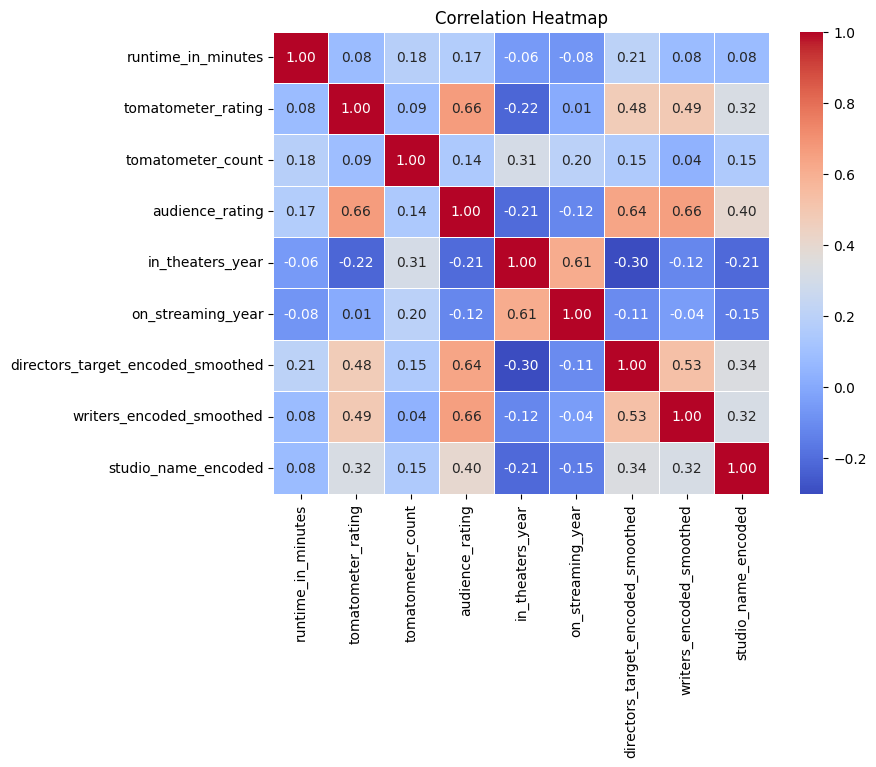

In [310]:
numeric_columns = df1[['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating','in_theaters_year','on_streaming_year','directors_target_encoded_smoothed','writers_encoded_smoothed','studio_name_encoded']]
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [311]:
df1.isnull().sum()

runtime_in_minutes                   0
tomatometer_status                   0
tomatometer_rating                   0
tomatometer_count                    0
audience_rating                      0
action                               0
adventur                             0
anim                                 0
anime                                0
art                                  0
classic                              0
comedi                               0
cult                                 0
documentari                          0
drama                                0
faith                                0
famili                               0
fantasi                              0
fiction                              0
fit                                  0
gay                                  0
horror                               0
house                                0
interest                             0
intern                               0
kids                     

# Dataset Preprocessing Summary

- **Before Preprocessing**:
  - **Rows**: 16,638
  - **Columns**: 16

- **After Preprocessing**:
  - **Rows**: 15,915
  - **Columns**: 53

- **Key Steps Taken**:
  1. **Null Values**: All rows with missing values were removed to ensure the dataset is clean and ready for model training.
  2. **Feature Extraction**: Important features were extracted, such as:
     - Creating new columns from date features like `in_theaters_date` and `on_streaming_date` (extracted month and year).
     - Text data  like `directors`, `writers`, and `studio_name` were encoded using   target encoding.
     - Other transformations were applied to improve the dataset's suitability for machine learning models, focusing on essential features for accurate predictions.


 # <span style="color:GREEN; font-weight:bold;">Model Building</span>


In [312]:

X = df1.drop(columns=['audience_rating']) 
y = df1['audience_rating'] 

In [313]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chosen Models

## 1. **Linear Regression**
   - **Model Chosen**: **Linear Regression**  
   - **Reason**: Linear Regression is a simple and interpretable model that assumes a linear relationship between the input features and the target variable. It serves as a baseline model for regression tasks.
   - **Key Advantages**:
     - Simple and easy to understand.
     - Fast to train and makes predictions.
     - Works well when the relationship between features and target is approximately linear.

## 2. **Bagging Technique: Random Forest**
   - **Model Chosen**: **Random Forest**  
   - **Reason**: Random Forest is an ensemble method that combines multiple decision trees to reduce variance and prevent overfitting, making it well-suited for handling complex datasets.
   - **Key Advantages**:
     - Handles high-dimensional data well.
     - Robust to overfitting due to the averaging of predictions from multiple trees.
     - Works well with both categorical and continuous data.

## 3. **Boosting Technique: XGBoost**
   - **Model Chosen**: **XGBoost**  
   - **Reason**: XGBoost is an efficient and highly scalable implementation of gradient boosting, which focuses on reducing bias and variance by building decision trees sequentially, with each tree correcting the errors of the previous one.
   - **Key Advantages**:
     - Often provides state-of-the-art performance on a wide range of datasets.
     - Handles missing data natively and has regularization capabilities.
     - Offers excellent speed and efficiency with parallelization.

## 4. **Bayesian Regression: Probabilistic Approach**
   - **Model Chosen**: **Bayesian Regression**  
   - **Reason**: Bayesian Regression applies a probabilistic approach to regression problems, which provides a distribution over the parameters instead of just a point estimate. This allows for incorporating uncertainty into the model and is useful when you want to express the uncertainty of predictions.
   - **Key Advantages**:
     - Provides a probabilistic framework, giving not just point predictions but also confidence intervals for predictions.
     - Can handle small datasets effectively by incorporating prior knowledge.
     - Helps in regularizing the model, reducing overfitting, and giving more robust estimates.
     - Incorporates uncertainty in model predictions, which can be beneficial in certain scenarios where confidence in predictions matters.


In [314]:
# create the pipeline
steps1=[(('lr',LinearRegression()))]

steps2=[(('rf_cregressor', RandomForestRegressor()))]

steps3=[(('xgb',XGBRegressor(
    n_estimators=500,         # Number of boosting rounds
    learning_rate=0.05,       # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    subsample=0.8,            # Subsample ratio of training data
    colsample_bytree=0.8,     # Subsample ratio of columns
    random_state=42
)))]
steps4=[(('br',BayesianRidge()))]


In [315]:

pipe1=Pipeline(steps=steps1)
pipe2=Pipeline(steps=steps2)
pipe3=Pipeline(steps=steps3)
pipe4=Pipeline(steps=steps4)


In [316]:
pipe1.fit(X_train_scaled,y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [317]:
pipe2.fit(X_train_scaled,y_train)

Pipeline(steps=[('rf_cregressor', RandomForestRegressor())])

In [318]:
pipe3.fit(X_train_scaled,y_train)

Pipeline(steps=[('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [319]:
pipe4.fit(X_train_scaled,y_train)

Pipeline(steps=[('br', BayesianRidge())])

# Model Prediction

In [320]:
linear_regression=pipe1.predict(X_test_scaled)
Randomforest=pipe2.predict(X_test_scaled)
xgboost=pipe3.predict(X_test_scaled)
bayesianridge=pipe4.predict(X_test_scaled)


# Linear Regression  Model

In [321]:
mse = mean_squared_error(y_test, linear_regression)
r2 = r2_score(y_test, linear_regression)
print("Mean Squared Error : ",mse)
print('R-square',r2)

Mean Squared Error :  146.59778835491048
R-square 0.6579591093798236


# Random Forest Model

In [322]:
mse = mean_squared_error(y_test, Randomforest)
r2 = r2_score(y_test, Randomforest)
print("Mean Squared Error : ",mse)
print('R-square',r2)

Mean Squared Error :  62.71772780395852
R-square 0.8536674549018105


# XGBRegressor Model

In [324]:
mse = mean_squared_error(y_test, xgboost)
r2 = r2_score(y_test, xgboost)
print("Mean Squared Error : ",mse)
print('R-square',r2)

Mean Squared Error :  60.55841265865454
R-square 0.8587055532504796


# Bayesian Regression

In [326]:
mse = mean_squared_error(y_test, bayesianridge)
r2 = r2_score(y_test, bayesianridge)
print("Mean Squared Error : ",mse)
print('R-square',r2)

Mean Squared Error :  146.60548058214752
R-square 0.6579411619313352


# Model Evaluation Results

| Model               | Mean Squared Error (MSE) | R-squared (R²) |
|---------------------|--------------------------|----------------|
| **Random Forest**    | 62.47                    | 0.8542         |
| **XGBoost**          | 60.56                    | 0.8587         |
| **Bayesian Regression** | 146.61               | 0.6579         |
| **Linear Regression** | 146.60                  | 0.65796        |

### Conclusion:
- **XGBoost** Performs well  with the highest R² score (85.87%) and the lowest MSE (60.56). It provides the most accurate predictions among the four models.
- **Random Forest** also performs well, but slightly worse than XGBoost.
- **Linear Regression** and **Bayesian Regression** show similar performance with lower R² (around 0.6579) and higher MSE (146.6), indicating they perform poorly compared to the other models.
